Lab 1 - Geometric primitives and transformations


In [1]:
!pip install numpy matplotlib scikit-image


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


✅ Tạo nền trắng


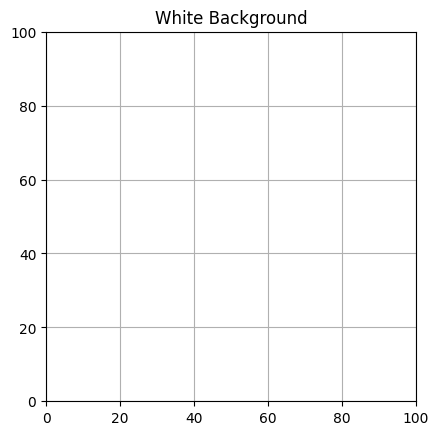

In [ ]:
# Tạo nền trắng
def create_white_background():
    fig, ax = plt.subplots()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_facecolor('white')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title("White Background")
    return fig, ax


fig, ax = create_white_background()
plt.show()


✅ Vẽ hình chữ nhật bằng cách chọn 2 điểm (p1 và p2)


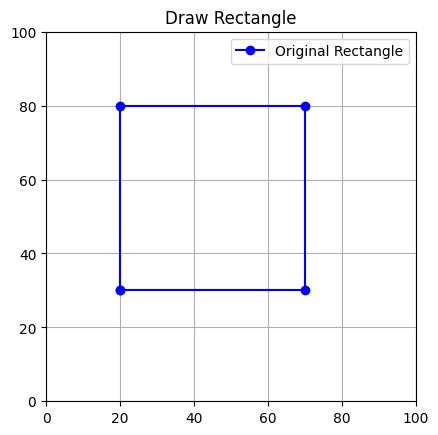

In [ ]:
# Vẽ hình chữ nhật cho hai điểm
def draw_rectangle(p1, p2, color='blue'):
    x1, y1 = p1
    x2, y2 = p2

    # Lấy tọa độ góc của hình chữ nhật (theo chiều kim đồng hồ)
    corners = np.array([
        [x1, y1],
        [x2, y1],
        [x2, y2],
        [x1, y2],
        [x1, y1]  # Đóng vòng lặp
    ])
    return corners


# Điểm ví dụ
p1 = (20, 30)
p2 = (70, 80)
rectangle = draw_rectangle(p1, p2)

# Vẽ
fig, ax = plt.subplots()
ax.plot(rectangle[:, 0], rectangle[:, 1], marker='o',
        color='blue', label='Original Rectangle')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
ax.set_title('Draw Rectangle')
ax.legend()
plt.grid(True)
plt.show()


✅ Translation Transformation (Tịnh tiến hình chữ nhật).


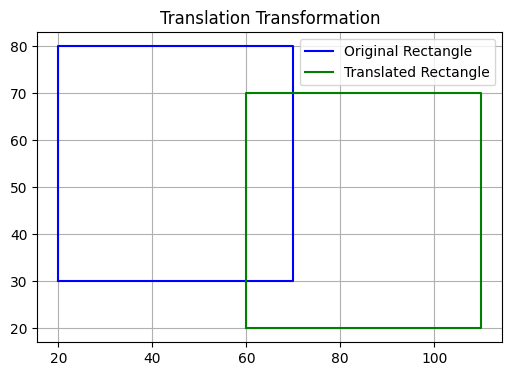

In [ ]:
# Các góc hình chữ nhật ban đầu
p1 = (20, 30)
p2 = (70, 80)
rect_coords = np.array([
    [p1[0], p1[1]],
    [p1[0], p2[1]],
    [p2[0], p2[1]],
    [p2[0], p1[1]],
    [p1[0], p1[1]]
])

# Translation values
tx, ty = 40, -10
translation_matrix = np.array([tx, ty])

# Giá trị dịch thuật
translated_rect = rect_coords + translation_matrix

# Vẽ
plt.figure(figsize=(6, 6))
plt.plot(rect_coords[:, 0], rect_coords[:, 1],
         label="Original Rectangle", color='blue')
plt.plot(translated_rect[:, 0], translated_rect[:, 1],
         label="Translated Rectangle", color='green')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Translation Transformation")
plt.show()


✅ Xoay hình chữ nhật (Rotation Transformation)


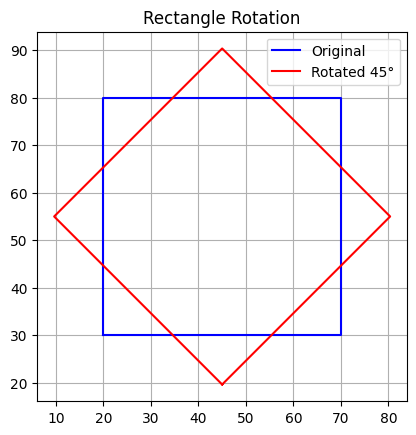

In [ ]:
# Hàm vẽ hình chữ nhật từ 2 điểm
def draw_rectangle(p1, p2, ax, color='blue', label=''):
    x1, y1 = p1
    x2, y2 = p2
    rect_x = [x1, x2, x2, x1, x1]
    rect_y = [y1, y1, y2, y2, y1]
    ax.plot(rect_x, rect_y, color=color, label=label)
    ax.set_aspect('equal')

# Hàm xoay tọa độ quanh tâm


def rotate(points, angle_deg, center):
    angle_rad = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad),  np.cos(angle_rad)]])
    return np.dot(points - center, R.T) + center


# Tọa độ gốc
p1 = np.array([20, 30])
p2 = np.array([70, 80])
rectangle = np.array([p1,
                      [p2[0], p1[1]],
                      p2,
                      [p1[0], p2[1]],
                      p1])

# Tâm xoay là tâm hình chữ nhật
center = (p1 + p2) / 2
rotated_rectangle = rotate(rectangle, angle_deg=45, center=center)

# Vẽ
fig, ax = plt.subplots()
draw_rectangle(p1, p2, ax, color='blue', label='Original')
ax.plot(rotated_rectangle[:, 0], rotated_rectangle[:,
        1], color='red', label='Rotated 45°')
ax.legend()
plt.title('Rectangle Rotation')
plt.grid(True)
plt.show()


✅ Affine Transformation & Projective Transform (Thêm)


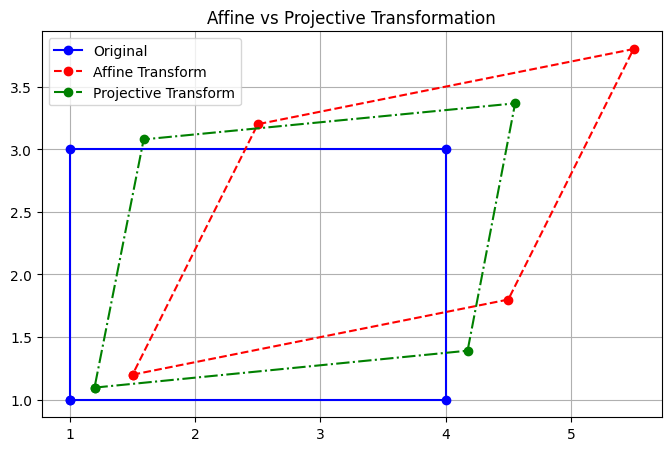

In [ ]:
import matplotlib.patches as patches

# Gốc hình chữ nhật ban đầu
rectangle = np.array([[1, 1],
                      [4, 1],
                      [4, 3],
                      [1, 3]])


def apply_affine(points, A, t):
    return np.dot(points, A.T) + t


def apply_projective(points, H):
    points_hom = np.hstack([points, np.ones((points.shape[0], 1))])
    projected = H @ points_hom.T
    projected /= projected[2]
    return projected[:2].T


# Biến đổi Affine: xiên + quay + co giãn
A_affine = np.array([[1, 0.5],
                     [0.2, 1]])
t_affine = np.array([0, 0])
rectangle_affine = apply_affine(rectangle, A_affine, t_affine)

# Biến đổi Projective: tạo hiệu ứng nhìn nghiêng
H_projective = np.array([[1, 0.2, 0],
                         [0.1, 1, 0],
                         [0.001, 0.002, 1]])
rectangle_projective = apply_projective(rectangle, H_projective)

# Hàm vẽ


def draw_transforms(original, affine, projective):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Hình gốc
    original_closed = np.vstack([original, original[0]])
    ax.plot(original_closed[:, 0],
            original_closed[:, 1], 'b-o', label='Original')

    # Affine
    affine_closed = np.vstack([affine, affine[0]])
    ax.plot(affine_closed[:, 0], affine_closed[:, 1],
            'r--o', label='Affine Transform')

    # Projective
    proj_closed = np.vstack([projective, projective[0]])
    ax.plot(proj_closed[:, 0], proj_closed[:, 1],
            'g-.o', label='Projective Transform')

    ax.set_aspect('equal')
    ax.set_title("Affine vs Projective Transformation")
    ax.legend()
    ax.grid(True)
    plt.show()


draw_transforms(rectangle, rectangle_affine, rectangle_projective)
